# SONAR : classification binaire rocher(R) ou mine (M)

#---------------------------------------------
##### CHARGEMENT DES OBSERVATIONS
#---------------------------------------------

À faire : validation et comparaiosn des méthodes de scaling, sauvegarde des poids

In [161]:
import pandas as pd
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

#peux faire : 
#import tensorflow as tf 
#print(tf.__version__)

#autre version 
import tensorflow
print(tensorflow.__version__)


#sequential ajoute les couche de maniere sequentielle, cest une classe initalemnt vide 
#qui va prendre sequentiellmnt , une couche d'entree, puis fully connected etc..
from tensorflow.keras.models import Sequential
#charge les types de couche 
#y'en a pour CNN 1D , faut faite 'chift tab'
from tensorflow.keras.layers import Input, Dense
#optimisers basés sur la SGD: desc gradient stochatic
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


import warnings
warnings.filterwarnings('ignore')


2.4.1


In [9]:
## Garantir la reproductibilité des résultats 
os.environ['TF_DETERMINISTIC_OPS'] = '1' #  c'est la ligne la plus importante
os.environ['PYTHONHASHSEED'] = '42'
os.environ['CUDA_VISIBLE_DEVICES'] = '' #  c'est facultatif
random.seed(42)
np.random.seed(42)
tensorflow.random.set_seed(42)

In [7]:
conda list | grep tensorflow

tensorflow                2.4.1                    pypi_0    pypi
tensorflow-estimator      2.4.0                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [8]:
sonar = pd.read_csv("sonar.all-data.csv", header = None)
sonar.head()



,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [10]:
sonar.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [11]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [32]:
#Now we will look for empty values in each column
sonar.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<AxesSubplot:>

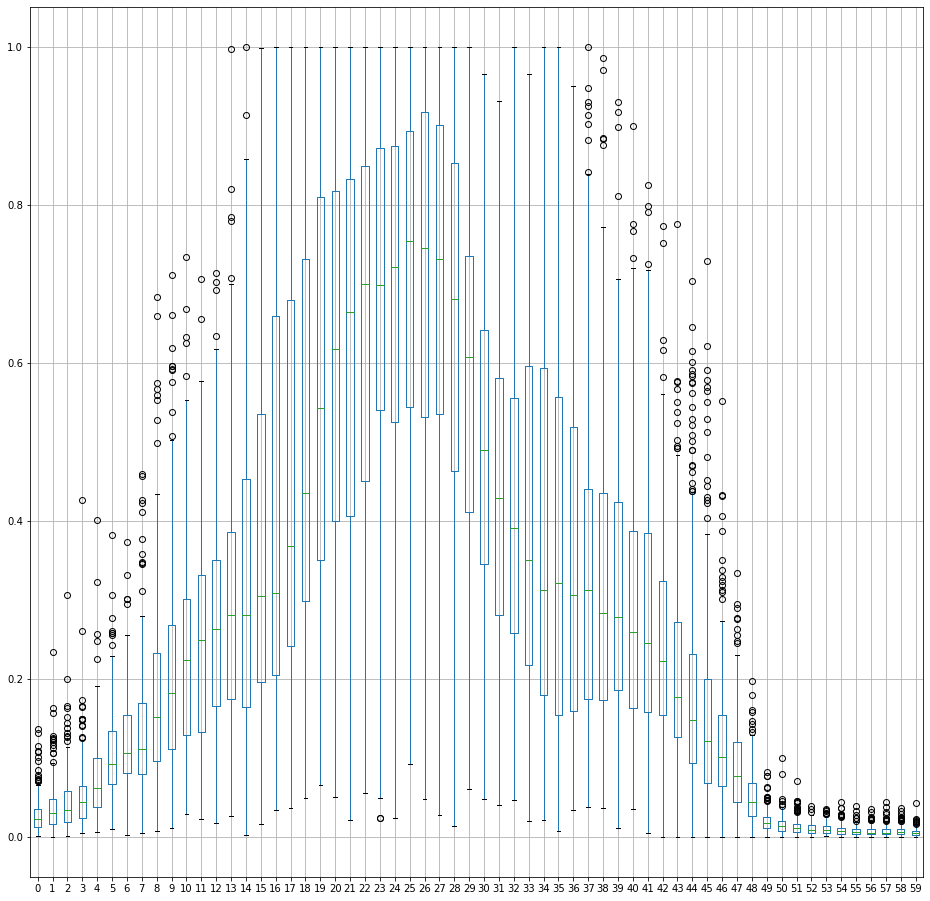

In [26]:
###EDA
sonar[range(60)].boxplot(figsize= (16,16))

In [104]:
#Creation des jeux d'apprentissage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = sonar[range(60)].values

#On ne prend que les libellé
y = sonar[60].values

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)



In [44]:
pd.DataFrame(train_x).describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.030173,0.039851,0.045374,0.056046,0.076060,0.106449,0.124832,0.140512,0.187339,0.213986,...,0.016357,0.013502,0.010960,0.011189,0.009494,0.008554,0.008206,0.008122,0.007935,0.006605
std,0.024730,0.035211,0.039062,0.046772,0.055510,0.061963,0.064102,0.090071,0.125158,0.138388,...,0.012772,0.010200,0.007405,0.007647,0.007461,0.005927,0.006133,0.006363,0.005932,0.005134
min,0.003600,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000200,0.000600
25%,0.013125,0.015200,0.019825,0.025700,0.038425,0.067825,0.081925,0.083000,0.097875,0.118125,...,0.008600,0.007125,0.004925,0.005325,0.003925,0.004625,0.003700,0.003750,0.003925,0.003200
50%,0.022650,0.029850,0.035950,0.045100,0.064650,0.092250,0.115400,0.114050,0.159600,0.185600,...,0.014000,0.011100,0.009950,0.009550,0.007500,0.007250,0.006600,0.006250,0.006800,0.005450
75%,0.036725,0.053200,0.060275,0.069575,0.103875,0.142425,0.154200,0.172600,0.243725,0.271250,...,0.021225,0.017200,0.015050,0.015000,0.012400,0.011550,0.010775,0.010275,0.010175,0.008575
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

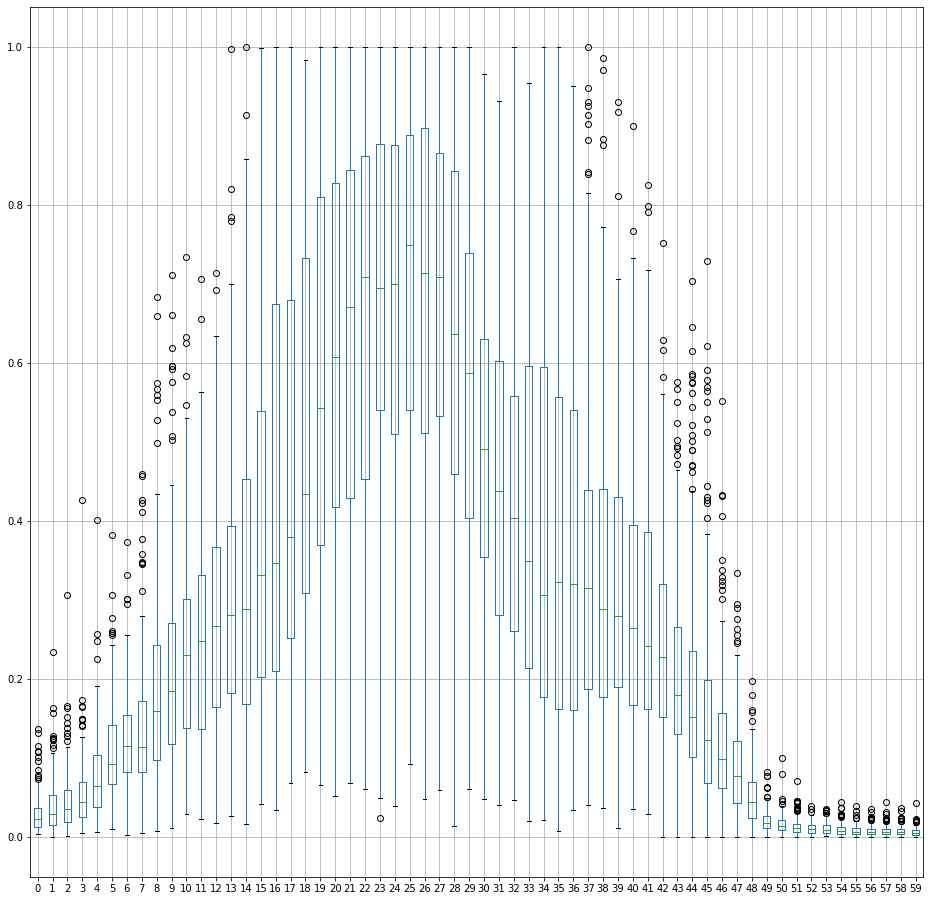

In [45]:
pd.DataFrame(train_x).boxplot(figsize=(16,16))

In [134]:
from sklearn.preprocessing import StandardScaler
scaler_sc = StandardScaler().fit(train_x)
scaler_sc

StandardScaler()

In [135]:
scaler_sc.mean_

array([0.0286247 , 0.03794036, 0.0428247 , 0.05338133, 0.07643614,
       0.10333855, 0.11932651, 0.13161084, 0.16948193, 0.19665301,
       0.22418976, 0.24031566, 0.26485   , 0.29034157, 0.31172229,
       0.36555301, 0.39679096, 0.4366247 , 0.4954488 , 0.56041325,
       0.60596988, 0.62476386, 0.65314578, 0.68178253, 0.68437349,
       0.70789337, 0.70761566, 0.69688434, 0.64225904, 0.58462048,
       0.5098    , 0.44326205, 0.42563494, 0.40759337, 0.38726205,
       0.38098012, 0.35733795, 0.3306994 , 0.32505602, 0.31957229,
       0.29471988, 0.28457169, 0.24784458, 0.215     , 0.19972952,
       0.16673795, 0.12838253, 0.09435663, 0.05242651, 0.02023193,
       0.01628494, 0.01318795, 0.01079759, 0.01060783, 0.0091988 ,
       0.00829458, 0.00792711, 0.00768434, 0.00802048, 0.00669217])

In [136]:
scaler_sc.scale_

array([0.02158398, 0.03361772, 0.03978886, 0.0482875 , 0.05652321,
       0.05620119, 0.06028425, 0.0846981 , 0.1148206 , 0.12200883,
       0.11952973, 0.12573793, 0.12719459, 0.15430946, 0.19699562,
       0.22390815, 0.25342716, 0.25407037, 0.25682948, 0.26573752,
       0.26728732, 0.26568871, 0.24808184, 0.23048422, 0.24450955,
       0.2252573 , 0.2323737 , 0.22782409, 0.23457152, 0.21727436,
       0.21380545, 0.21544667, 0.20938755, 0.23652779, 0.26536215,
       0.2664083 , 0.23980422, 0.20888013, 0.19340289, 0.17989078,
       0.17200737, 0.17041828, 0.14092523, 0.13271108, 0.15159265,
       0.13356627, 0.08705829, 0.06131978, 0.03500544, 0.01325215,
       0.01153662, 0.00953178, 0.00677196, 0.00706417, 0.0072206 ,
       0.00567984, 0.00568962, 0.0062646 , 0.00648339, 0.00526256])

In [137]:
X_scaled = scaler_sc.transform(train_x)

In [138]:
train_x_sc = scaler.transform(train_x)
test_x_sc = scaler.transform(test_x) 

<AxesSubplot:>

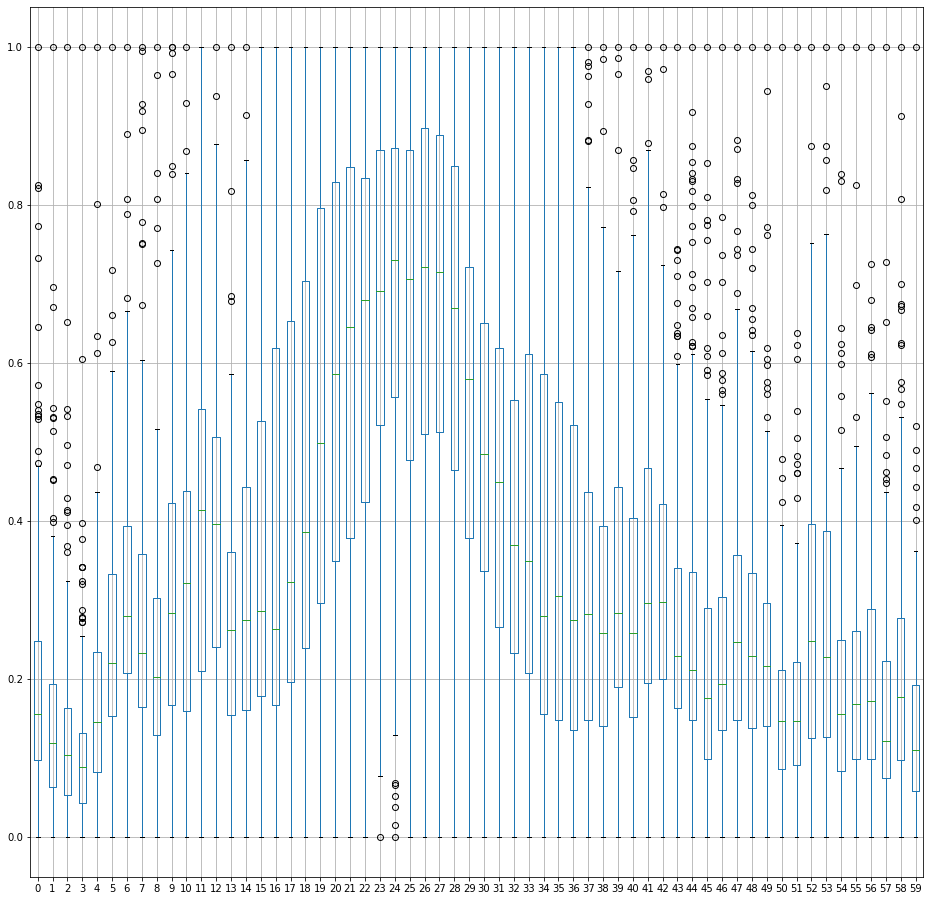

In [139]:
pd.DataFrame(train_x_sc).boxplot(figsize=(16,16))

In [155]:
#MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler_mnx = MinMaxScaler().fit(train_x)


X_scaled = scaler_mnx.transform(train_x)

train_x_mnx=scaler_mnx.transform(train_x)
test_x_mnx=scaler_mnx.transform(test_x)

In [156]:
train_x_mnx=scaler_mnx.transform(train_x)

In [157]:
scaler_mnx.data_max_

array([0.1313, 0.2339, 0.3059, 0.4264, 0.401 , 0.3823, 0.3729, 0.459 ,
       0.6828, 0.5966, 0.6254, 0.5632, 0.6343, 0.997 , 1.    , 0.9988,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9657, 0.9306,
       1.    , 0.9647, 1.    , 1.    , 0.9497, 0.948 , 0.9857, 0.9297,
       0.8995, 0.8246, 0.7733, 0.7762, 0.7034, 0.7292, 0.5522, 0.3339,
       0.1981, 0.0825, 0.1004, 0.0709, 0.0361, 0.0352, 0.0447, 0.0394,
       0.0355, 0.044 , 0.0364, 0.0439])

<AxesSubplot:>

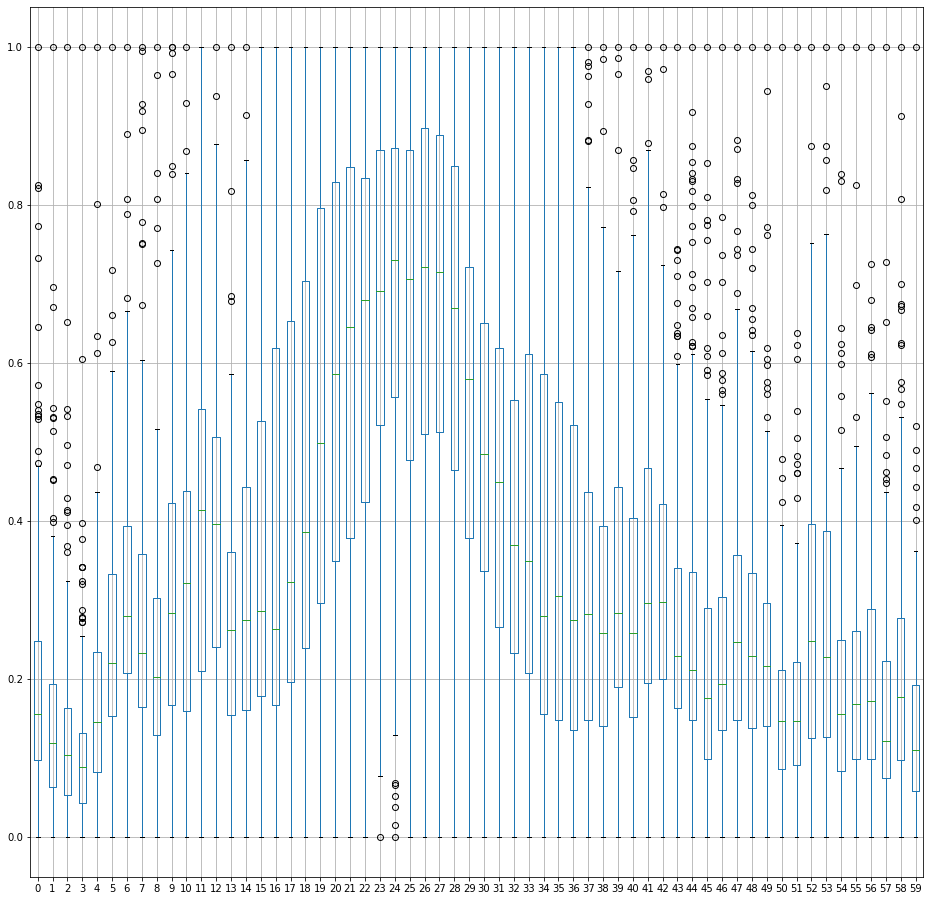

In [158]:
pd.DataFrame(train_x_mnx).boxplot(figsize=(16,16))

#---------------------------------------------
##### PREPARATION DES DONNEES
#---------------------------------------------

In [ ]:
#Creation des jeux d'apprentissage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = sonar[range(60)].values

#On ne prend que les libellé
y = sonar[60].values

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [19]:
sonar[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [16]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [20]:
#On encode : Les mines sont égales à 0 et les rochers égaux à 1
#remplace par  0 et 1

sonar[60].replace({"M": 1, "R": 0} , inplace = True)

In [22]:
#y devient 
y = sonar[60].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#---------------------------------------------
##### CREATION DES JEUX D'APPRENTISSAGE ET DE TEST
#---------------------------------------------

In [24]:
#On mélange
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1)


#Creation des jeux d'apprentissage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)



In [38]:
X.shape

(208, 60)

In [39]:
y.shape

(208,)

In [33]:
#RN

In [35]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [40]:
#construire le modèle
#ajout des couches 

#def de la methode :initialisation
def classifier(optimizer): 
    model = Sequential() 
    model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=60)) #premiere couche 
    
    
    #3 autres couches 
    #probabilité  de la classification grace a la sigmoid
    model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #couche de maxpooling
    
    #complile le model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




# choisir des hyperparamètres : gridsearchcv , permet de choisir l'optmiseur 
#from kerasclassifier avec les param par defaut
model = KerasClassifier(build_fn=classifier)    

#proposition de parametres a mon NN 
params = {'batch_size': [1, 5], 'epochs': [100, 120], 'optimizer': ['adam', 'rmsprop']}


#l'estimateur :
gridSearch = GridSearchCV(estimator = model, param_grid=params, scoring='accuracy', cv=10)

gridSearch = gridSearch.fit(train_x, train_y)


#il va generer les models jusqu'a trouver les meilleurs : on va les utiliser pour recalibrer le model 
score = gridSearch.best_score_
bestParams = gridSearch.best_params_

#affichage des best param qu'on va regler 
print('best_accuracy_score:',score)
print('best_parameters:',  bestParams)


Epoch 1/100
149/149 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.6158
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5631
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5618
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5728
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5678
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5105
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6302
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.5742
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.5327
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.5927 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5750
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5220
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5613
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5486
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5424
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.4880
Epoch 7/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.5997
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6242
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6483
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.5550 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5945
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4864
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5589
Epoch 4/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5800
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5123
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.4976
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.5970
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.6677
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6688
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.5523 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5309
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4932
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5335
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5881
Epoch 5/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5034
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.4840
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.5936
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.5779
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6125
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.5877 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.4820
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4697
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5231
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5893
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5244
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5610
Epoch 7/100
149/149 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.6074
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5819
Epoch 9/100
149/149 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5576
Epoch 10/100
149/149 [==============================] - 0s 3ms/step - loss: 0.6877 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 2s 1ms/step - loss: 0.6933 - accuracy: 0.4860
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4760
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5206
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.6044
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5323
Epoch 6/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5579
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5798
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5859
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5354
Epoch 10/100
149/149 [==============================] - 1s 5ms/step - loss: 0.6879 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
150/150 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4857
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5683
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5586
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4586
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5845
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4929
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5603
Epoch 8/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4776
Epoch 9/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4973
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6940 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
150/150 [==============================] - 2s 5ms/step - loss: 0.6933 - accuracy: 0.5303
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5426
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5365
Epoch 4/100
150/150 [==============================] - 1s 9ms/step - loss: 0.6943 - accuracy: 0.4639
Epoch 5/100
150/150 [==============================] - 1s 5ms/step - loss: 0.6911 - accuracy: 0.5717
Epoch 6/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4979
Epoch 7/100
150/150 [==============================] - 1s 3ms/step - loss: 0.6908 - accuracy: 0.5583
Epoch 8/100
150/150 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.4979
Epoch 9/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4833
Epoch 10/100
150/150 [==============================] - 1s 3ms/step - loss: 0.6940 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
150/150 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5689: 0s - loss: 0.6927 - accura
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5353
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5293
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4482
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5806
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4811
Epoch 7/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5765
Epoch 8/100
150/150 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.5021
Epoch 9/100
150/150 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 0.4757: 0s - loss: 0.697
Epoch 10/100
150/150 [=======================

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
150/150 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4677
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5459
Epoch 3/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5267
Epoch 4/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4563
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.5934
Epoch 6/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4844
Epoch 7/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5699
Epoch 8/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4796
Epoch 9/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4633
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6951 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.6158
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5631
Epoch 3/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5618
Epoch 4/100
149/149 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5728
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5678
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5105
Epoch 7/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.6302
Epoch 8/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5742
Epoch 9/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5259
Epoch 10/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6428 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5750
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5220
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5613
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5486
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5424
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4880
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5997
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5641
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5317
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6574 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.5572
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4864
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5589
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5800
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5123
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5922
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5401
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5260
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6901 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5681
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4932
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5335
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5881
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5034
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4840
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5936
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5534
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.5738
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6399 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.4805
Epoch 2/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4697
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5231
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5893
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5244
Epoch 6/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5610
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6074
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.5819
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.5576
Epoch 10/100
149/149 [==============================] - 0s 3ms/step - loss: 0.6251 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
149/149 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4835
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4760
Epoch 3/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5206
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6044
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5323
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5579
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5798
Epoch 8/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5859
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5354
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6450 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
150/150 [==============================] - 2s 1ms/step - loss: 0.6933 - accuracy: 0.5266
Epoch 2/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5683
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5586
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4586
Epoch 5/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5845
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.4929
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5599
Epoch 8/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6451
Epoch 9/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6507
Epoch 10/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6238 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
150/150 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4994
Epoch 2/100
150/150 [==============================] - 1s 6ms/step - loss: 0.6930 - accuracy: 0.5426
Epoch 3/100
150/150 [==============================] - 1s 6ms/step - loss: 0.6927 - accuracy: 0.5365
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.6941 - accuracy: 0.4639
Epoch 5/100
150/150 [==============================] - 1s 6ms/step - loss: 0.6910 - accuracy: 0.5717
Epoch 6/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4979
Epoch 7/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5583
Epoch 8/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4979
Epoch 9/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4833
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6941 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
150/150 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5661
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5081
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5293
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4488
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5888
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.6647
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6970
Epoch 8/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6718
Epoch 9/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.6613
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5965 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
150/150 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/100
150/150 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5459
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5267
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4592
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.6249
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6923
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.7631
Epoch 8/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7170
Epoch 9/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7354
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5932 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5785
Epoch 2/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5631
Epoch 3/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5618
Epoch 4/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5728
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5678
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5105
Epoch 7/120
149/149 [==============================] - 1s 4ms/step - loss: 0.6325 - accuracy: 0.6302
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.5742
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.5327
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - loss: 0.5898 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.6123
Epoch 2/120
149/149 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5220
Epoch 3/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5613
Epoch 4/120
149/149 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5486
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5424
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.4880
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.6582
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.6865
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6670
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - loss: 0.5169 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.5572
Epoch 2/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4864
Epoch 3/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5589
Epoch 4/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5800
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5123
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5295
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.7103
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7772
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.6613
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - loss: 0.4749 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5309
Epoch 2/120
149/149 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.4932
Epoch 3/120
149/149 [==============================] - 1s 6ms/step - loss: 0.6911 - accuracy: 0.5335: 0s - loss: 0.692
Epoch 4/120
149/149 [==============================] - 1s 6ms/step - loss: 0.6807 - accuracy: 0.5939
Epoch 5/120
149/149 [==============================] - 1s 5ms/step - loss: 0.6584 - accuracy: 0.6421
Epoch 6/120
149/149 [==============================] - 1s 5ms/step - loss: 0.6038 - accuracy: 0.6769
Epoch 7/120
149/149 [==============================] - 1s 4ms/step - loss: 0.5213 - accuracy: 0.8410
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7686
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.6990
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - los

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4820
Epoch 2/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4697
Epoch 3/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5231
Epoch 4/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5893
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5244
Epoch 6/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.5853
Epoch 7/120
149/149 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7658
Epoch 8/120
149/149 [==============================] - 1s 4ms/step - loss: 0.5408 - accuracy: 0.7159
Epoch 9/120
149/149 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.6995
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - loss: 0.4723 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4860
Epoch 2/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4760
Epoch 3/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5206
Epoch 4/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.6044
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5323
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5579
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5798
Epoch 8/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5859
Epoch 9/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5354
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6879 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
150/150 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4857
Epoch 2/120
150/150 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5683
Epoch 3/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5586
Epoch 4/120
150/150 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4586
Epoch 5/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5845
Epoch 6/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4929
Epoch 7/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5603
Epoch 8/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4776
Epoch 9/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4973
Epoch 10/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6940 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
150/150 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4933
Epoch 2/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5426
Epoch 3/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5365
Epoch 4/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4639
Epoch 5/120
150/150 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5717
Epoch 6/120
150/150 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4979
Epoch 7/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5583
Epoch 8/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4979
Epoch 9/120
150/150 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4833
Epoch 10/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6940 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
150/150 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5706
Epoch 2/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5353
Epoch 3/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5293
Epoch 4/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4037
Epoch 5/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6475
Epoch 6/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6724
Epoch 7/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7119
Epoch 8/120
150/150 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7340
Epoch 9/120
150/150 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.6960
Epoch 10/120
150/150 [==============================] - 0s 2ms/step - loss: 0.5313 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
150/150 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4677
Epoch 2/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5459
Epoch 3/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5267
Epoch 4/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4563
Epoch 5/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5934
Epoch 6/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4844
Epoch 7/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5699
Epoch 8/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4796
Epoch 9/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4633
Epoch 10/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6951 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5785
Epoch 2/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5631
Epoch 3/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5618
Epoch 4/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5728
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5678
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5105
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6302
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5742
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5259
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6463 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.6123
Epoch 2/120
149/149 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5220
Epoch 3/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5613
Epoch 4/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5486
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5424
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4880
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5997
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.5641
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5317 ETA: 0s - loss: 0.7035 - accuracy
Epoch 10/120
149/149 [==============================] - 0

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5945
Epoch 2/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4864
Epoch 3/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5589
Epoch 4/120
149/149 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5800
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5123
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.4976
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5922
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5401
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5260
Epoch 10/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6506 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5681
Epoch 2/120
149/149 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4932
Epoch 3/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5335
Epoch 4/120
149/149 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5881
Epoch 5/120
149/149 [==============================] - 1s 4ms/step - loss: 0.6893 - accuracy: 0.5034
Epoch 6/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.4840
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.5936
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.5592
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.5922
Epoch 10/120
149/149 [==============================] - 0s 1ms/step - loss: 0.6015 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4805
Epoch 2/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4697
Epoch 3/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5231
Epoch 4/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5893
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5244
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5610
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6074
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5819
Epoch 9/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5576
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6878 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
149/149 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5208
Epoch 2/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4760
Epoch 3/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5206
Epoch 4/120
149/149 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.6044
Epoch 5/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5323
Epoch 6/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5579
Epoch 7/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.5798
Epoch 8/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.6136
Epoch 9/120
149/149 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6397
Epoch 10/120
149/149 [==============================] - 0s 2ms/step - loss: 0.5538 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
150/150 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5266
Epoch 2/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5683
Epoch 3/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5586
Epoch 4/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4586
Epoch 5/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5845
Epoch 6/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.4929
Epoch 7/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5603
Epoch 8/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.4776
Epoch 9/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.4973
Epoch 10/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6558 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
150/150 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5365
Epoch 2/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5426
Epoch 3/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5365
Epoch 4/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4608
Epoch 5/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.6292
Epoch 6/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.7843
Epoch 7/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.7205
Epoch 8/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.6652
Epoch 9/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6447
Epoch 10/120
150/150 [==============================] - 0s 2ms/step - loss: 0.5814 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
150/150 [==============================] - 2s 4ms/step - loss: 0.6929 - accuracy: 0.5661
Epoch 2/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5353
Epoch 3/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5293
Epoch 4/120
150/150 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4482: 0s - loss: 0.6945 - accuracy
Epoch 5/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5806
Epoch 6/120
150/150 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.4811
Epoch 7/120
150/150 [==============================] - 1s 4ms/step - loss: 0.6906 - accuracy: 0.5765
Epoch 8/120
150/150 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5021
Epoch 9/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4757
Epoch 10/120
150/150 [==============================] - 0s 2m

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
150/150 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5371
Epoch 2/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5459
Epoch 3/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5267
Epoch 4/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4563
Epoch 5/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5934
Epoch 6/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.4844
Epoch 7/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5891
Epoch 8/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6843
Epoch 9/120
150/150 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6424
Epoch 10/120
150/150 [==============================] - 0s 1ms/step - loss: 0.6469 - accura

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.6050
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5603
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5677
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5726
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5649
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5173
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6221
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6737 - accuracy: 0.5671
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5323
Epoch 10/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.5945
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.6009
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5207
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5650
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5480
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5400
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4963
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5911
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5560
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5364
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.5623
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5047
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4854
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5600
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5746
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5126
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5062
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5845
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5327
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5306
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5444
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4812
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4918: 0s - loss: 0.6934 - accuracy: 0.46
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5337
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5817
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4988
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4945
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5850
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5452
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5724
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss:

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5096
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4699
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5242
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5840
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5194
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5685
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.6008
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5733
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.5572
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.5654
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5128
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4755
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5226
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5981
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5269
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5654
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.5753
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.5775
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5366
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.5733
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5170
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5730
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5600
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4702
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5823
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5007
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.7022
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6294
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.6431
Epoch 10/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6367
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4752
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5473
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5373
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4752
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5697
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5052
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5621
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.6543
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6640
Epoch 10/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6314 - accuracy: 0.6636
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5621
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4872
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5301
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4583
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5794
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5152
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.7271
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5579
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6124
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6902
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5511
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4553
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5266
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4623
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5924
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4961
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5722
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6988
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.6471
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.6906
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5530
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5603
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5677
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5726
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5649
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5173
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6221
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5671
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5323
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5945
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5229
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5207
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5650
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5480
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5400
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5911
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5560
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5364
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5623
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5827
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4854
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5600
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5746
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5126
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5062
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5845
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5327
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5306
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.5444
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4812
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4918
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5337
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.5817
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4988
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4945
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5850
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5452
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5724
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5791
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4270
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4699
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5242
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5840
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5194
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5685
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.6008
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5733
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5572
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5654
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4758
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4755
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5226
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6917 - accuracy: 0.5981
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5269
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5654
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5753
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5775
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5366
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5733
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4227
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5730
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5600
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4702
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5823
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5007
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5644
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4860
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5024
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5029
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5616
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5473
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5373
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4752
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5697
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5052
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5621
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5046
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.4967
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5412
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4386 
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5400
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5301
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5794
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4927
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5793
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5086
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4812
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4709
Epoch 11

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4655
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4741
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5266
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4623
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5924
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4961
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5722
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4915
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4691
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4600
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5270
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5603
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5677
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5726
Epoch 5/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5649
Epoch 6/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5173
Epoch 7/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6221
Epoch 8/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5671
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5323
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.5945
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5489
Epoch 2/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5207
Epoch 3/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5650
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5480
Epoch 5/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5400
Epoch 6/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4963
Epoch 7/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5911
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5560
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5364
Epoch 10/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.5623
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5047
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4854
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5600
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5746
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5126
Epoch 6/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5062
Epoch 7/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5845
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5327
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5306
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.5444
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4812
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4918
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5337
Epoch 4/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5817
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4988
Epoch 6/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4945
Epoch 7/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5850
Epoch 8/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5452
Epoch 9/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5724
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5791
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5096
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4699
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5242
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5840
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5194
Epoch 6/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5685
Epoch 7/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.6008
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.5733
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.5572
Epoch 10/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.5654
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4868
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4755
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5226
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5981
Epoch 5/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5269
Epoch 6/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5654
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5753
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.5775
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.5366
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.6295
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4650
Epoch 2/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5730
Epoch 3/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5600
Epoch 4/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4702
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5823
Epoch 6/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5007
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5644
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4860
Epoch 9/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5024
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5029
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5272
Epoch 2/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5473
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5373
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4752
Epoch 5/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5697
Epoch 6/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5621
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5046
Epoch 9/120
30/30 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4882
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5101
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4959
Epoch 3/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5301
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4583
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5794
Epoch 6/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4927
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5793
Epoch 8/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6488
Epoch 9/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6456
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6648
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5511
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4553
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5266
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4623
Epoch 5/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5924
Epoch 6/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5146
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.7375
Epoch 8/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.6274
Epoch 9/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6210
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7006
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5270
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5603
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5677
Epoch 4/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5726
Epoch 5/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5649
Epoch 6/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5173
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6221
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5671
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5323
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5945
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 2s 3ms/step - loss: 0.6929 - accuracy: 0.6009
Epoch 2/120
30/30 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5207
Epoch 3/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5650
Epoch 4/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5480
Epoch 5/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5400
Epoch 6/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4963
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5911
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5560
Epoch 9/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5364
Epoch 10/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5623
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 3s 3ms/step - loss: 0.6930 - accuracy: 0.5567
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4854
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5600
Epoch 4/120
30/30 [==============================] - 0s 7ms/step - loss: 0.6910 - accuracy: 0.5746
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5126
Epoch 6/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5062
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5845
Epoch 8/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5327
Epoch 9/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5306
Epoch 10/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5444
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 3s 6ms/step - loss: 0.6931 - accuracy: 0.5591
Epoch 2/120
30/30 [==============================] - 0s 8ms/step - loss: 0.6933 - accuracy: 0.4918
Epoch 3/120
30/30 [==============================] - 0s 11ms/step - loss: 0.6927 - accuracy: 0.5337
Epoch 4/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5817
Epoch 5/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 6/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4945
Epoch 7/120
30/30 [==============================] - 0s 6ms/step - loss: 0.6895 - accuracy: 0.5850
Epoch 8/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5452
Epoch 9/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.5724
Epoch 10/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.5791
Epoch 11

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4790
Epoch 2/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.4699
Epoch 3/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5242
Epoch 4/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5840
Epoch 5/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5194
Epoch 6/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5685
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.6008
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5733
Epoch 9/120
30/30 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5572
Epoch 10/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5654
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4411
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4755
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5226
Epoch 4/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5981
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5269
Epoch 6/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5654
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5753
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5775
Epoch 9/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5366
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5813
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4227 
Epoch 2/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5730
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5600
Epoch 4/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4702
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5823
Epoch 6/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5007
Epoch 7/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5644
Epoch 8/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4860
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5024
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5029
Epoch 11

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5452
Epoch 2/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5473
Epoch 3/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5373
Epoch 4/120
30/30 [==============================] - 0s 8ms/step - loss: 0.6935 - accuracy: 0.4752
Epoch 5/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5697
Epoch 6/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052
Epoch 7/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5621
Epoch 8/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5046
Epoch 9/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4882
Epoch 10/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5023
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 3s 5ms/step - loss: 0.6932 - accuracy: 0.4386
Epoch 2/120
30/30 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5400
Epoch 3/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5301
Epoch 4/120
30/30 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 5/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5794
Epoch 6/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.4927
Epoch 7/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5793
Epoch 8/120
30/30 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5086
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4812
Epoch 10/120
30/30 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.4709
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/120
30/30 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4655
Epoch 2/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4741
Epoch 3/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5266
Epoch 4/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4623
Epoch 5/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5924
Epoch 6/120
30/30 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4961
Epoch 7/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5722
Epoch 8/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4915
Epoch 9/120
30/30 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4691
Epoch 10/120
30/30 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4600
Epoch 11/

/Users/laetitiadoriane/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5307
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5344
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4996
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5062
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4910: 0s - loss: 0.6939 - accuracy: 0.
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5617
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5863
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5317
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5547
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0

In [49]:
model = Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=60))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [50]:
#Compilez le classifieur
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Maintenant ajustons sur les données: ici on lui mets les best params trouvés 
model.fit(train_x, train_y, batch_size=5, epochs=100)



Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.4833
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5344
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4996
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5062
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4910
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5617
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.5863
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5317
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.5827
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.7073
Epoch 11/

In [53]:
#Evaluation du modèle

#premiere evalutaion on teste les ypred sur les 20% de xtest pour voir si ypred correspond a y initial 
#mais le resultat donne des valeurs float au lieu de 0 et 1, donc on va mettre un filtre 
yPred = model.predict(test_x)
yPred

array([[0.2827255 ],
       [0.83986926],
       [0.7965815 ],
       [0.95956945],
       [0.01813942],
       [0.39557174],
       [0.24249053],
       [0.94935745],
       [0.17204067],
       [0.940915  ],
       [0.46055388],
       [0.0300855 ],
       [0.63995236],
       [0.55886364],
       [0.8943293 ],
       [0.39562887],
       [0.02457607],
       [0.50843585],
       [0.66473955],
       [0.04755324],
       [0.01660672],
       [0.9839742 ],
       [0.09327632],
       [0.5023264 ],
       [0.98292387],
       [0.5796765 ],
       [0.9616091 ],
       [0.42707172],
       [0.5669898 ],
       [0.95348066],
       [0.9603173 ],
       [0.07705304],
       [0.8443377 ],
       [0.03936383],
       [0.49661332],
       [0.00409046],
       [0.00250122],
       [0.44938898],
       [0.97359395],
       [0.8783289 ],
       [0.15960297],
       [0.6606711 ]], dtype=float32)

In [54]:
#le filtre qui rends ypred binaire 
yPred = [1 if y > 0.5 else 0 for y in yPred]
yPred

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1]

In [57]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_y, yPred)
#formule de l'accuracy = TP+FN, bref la somme de la disgonale partant des TP/la somme de toute la matrice 
matrix

array([[16,  4],
       [ 4, 18]])

In [58]:
accuracy = (matrix[0][0] + matrix[1][1]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1])
#on multipplie par 100 pour avoir en %
print("Accuracy: " + str(accuracy * 100) + "%")




Accuracy: 80.95238095238095%


In [166]:
def plot_learning_curves(history = history):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
#     plt.figure(figsize = (20, 10))
#     plt.plot(epochs, acc)
#     plt.plot(epochs, val_acc)
#     plt.title('Training and validation accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc = 'upper left')
    
#     plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

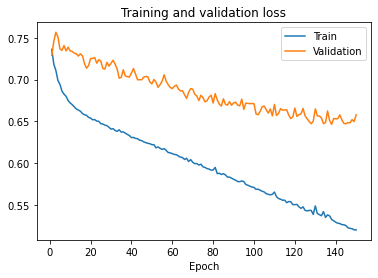

In [167]:
plot_learning_curves(history)

#---------------------------------------------
#### CREATION DU RESEAU DE NEURONES
#---------------------------------------------
#sans Gridsearch

In [66]:
X= sonar.iloc[:,0:60]
nb_features = len(X.columns)
nb_features

60

In [72]:
# Exemple de création d'un NN avec `Functional API` 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Couche d'entrée
inputs = Input(shape=(nb_features,))
# inputs.get_shape()
# inputs.name

# Couches cachées : 
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='sigmoid')(x)

# Couche de sortie
outputs = Dense(1, activation='sigmoid')(x)

model1 = Model(inputs=inputs, outputs=outputs)
model1.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_674 (Dense)            (None, 16)                976       
_________________________________________________________________
dense_676 (Dense)            (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [73]:
model1.get_weights()

[array([[ 1.21210724e-01, -1.76968053e-01, -1.10031679e-01,
         -2.49441266e-01, -1.77889019e-01,  1.66740716e-01,
          2.67667264e-01, -1.48367137e-01,  2.03934073e-01,
          1.62150860e-02,  9.89004970e-03,  2.42610604e-01,
         -4.48458791e-02,  2.57367820e-01,  7.94455111e-02,
         -1.78249836e-01],
        [-1.83569163e-01, -2.73062348e-01, -5.44355363e-02,
          2.77066320e-01,  2.22659141e-01, -1.83342397e-02,
          1.44501299e-01,  6.13961220e-02,  2.92113721e-02,
         -1.31214395e-01, -1.93780288e-01,  1.46505773e-01,
          1.60967737e-01, -6.19110614e-02, -1.28613919e-01,
          4.52965796e-02],
        [ 2.01950908e-01,  2.15609461e-01,  4.67065871e-02,
         -3.87221277e-02,  1.23799503e-01, -2.43149519e-01,
         -1.92390591e-01, -4.40852046e-02,  4.94813919e-03,
          2.52670437e-01,  2.26990014e-01,  1.08313918e-01,
         -1.38878763e-01, -1.87501997e-01,  2.33670563e-01,
         -2.07743853e-01],
        [-1.0734818

In [74]:
# Est-ce qu'on obtient les mêmes poids initiaux (en recréant le NN, reproduire les résultats) ? 
model2 = Sequential()
model2.add(Dense(units=16, input_dim=60, activation="sigmoid"))
model2.add(Dense(units=8, activation='relu'))

model2.add(Dense(units=1, activation="sigmoid"))
model2.get_weights()

[array([[ 1.18615627e-01, -2.39069566e-01, -1.29395157e-01,
         -2.20028982e-01,  2.35206157e-01,  8.89849961e-02,
          2.09212601e-02, -1.73900455e-01, -3.27775180e-02,
          1.86270326e-01, -1.19069681e-01, -1.25448048e-01,
         -2.27643788e-01,  2.22024322e-03,  2.55556196e-01,
          5.44823110e-02],
        [ 2.40962714e-01,  9.60174799e-02, -2.33316541e-01,
          4.90765572e-02, -2.51806676e-02,  2.72273272e-01,
         -2.30854198e-01,  3.25873494e-03, -1.83123544e-01,
         -7.13515282e-03, -1.46463811e-02, -1.63945228e-01,
         -9.22224224e-02,  2.21354634e-01, -2.51115739e-01,
         -1.57277852e-01],
        [ 2.27757126e-01, -2.44432107e-01,  1.42461121e-01,
          5.75274229e-03, -1.49893239e-01, -2.86638737e-04,
         -2.20827505e-01,  2.15648770e-01, -2.26098195e-01,
          5.02743423e-02,  2.40991324e-01, -8.16580653e-02,
         -2.63278633e-01,  2.27240324e-02, -1.51056513e-01,
         -1.88356653e-01],
        [ 2.3264184

In [75]:
# Compiler le modèle
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [78]:

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=100, random_state=42, stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, stratify = y, random_state = 42)

# Apprentissage
history = model1.fit(train_x, train_y, epochs=150, batch_size=10, validation_split=0.2)

Epoch 1/150
9/9 [==============================] - 1s 48ms/step - loss: 0.7225 - accuracy: 0.5407 - val_loss: 0.7289 - val_accuracy: 0.5909
Epoch 2/150
9/9 [==============================] - 0s 11ms/step - loss: 0.7255 - accuracy: 0.3921 - val_loss: 0.7460 - val_accuracy: 0.3636
Epoch 3/150
9/9 [==============================] - 0s 12ms/step - loss: 0.7113 - accuracy: 0.4899 - val_loss: 0.7566 - val_accuracy: 0.1818
Epoch 4/150
9/9 [==============================] - 0s 11ms/step - loss: 0.7110 - accuracy: 0.4552 - val_loss: 0.7511 - val_accuracy: 0.2727
Epoch 5/150
9/9 [==============================] - 0s 10ms/step - loss: 0.6912 - accuracy: 0.5405 - val_loss: 0.7366 - val_accuracy: 0.2727
Epoch 6/150
9/9 [==============================] - 0s 10ms/step - loss: 0.6801 - accuracy: 0.5019 - val_loss: 0.7350 - val_accuracy: 0.3636
Epoch 7/150
9/9 [==============================] - 0s 15ms/step - loss: 0.6807 - accuracy: 0.5435 - val_loss: 0.7407 - val_accuracy: 0.3182
Epoch 8/150
9/9 [===

In [79]:
history.history.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
    
pd.DataFrame({'acc' : acc, 'val_acc' : val_acc, 'loss' : loss, 'val_loss' : val_loss})

,acc,val_acc,loss,val_loss
0,0.476744,0.590909,0.736111,0.728925
1,0.430233,0.363636,0.718329,0.746025
2,0.488372,0.181818,0.710868,0.756636
3,0.511628,0.272727,0.698868,0.751070
4,0.511628,0.272727,0.694138,0.736576
...,...,...,...,...
145,0.767442,0.636364,0.522423,0.648331
146,0.767442,0.636364,0.521739,0.648113
147,0.755814,0.636364,0.521259,0.651968
148,0.767442,0.636364,0.519915,0.649606


In [80]:
# Les poids finaux après entraînement
model1.get_weights()

[array([[ 8.90917331e-02, -1.12014413e-01, -8.34873244e-02,
         -4.79597487e-02, -2.23082423e-01,  2.15943769e-01,
          4.38224763e-01, -1.89161628e-01,  8.35683495e-02,
         -5.01602851e-02,  1.57785963e-03,  3.04785669e-01,
          1.95452258e-01,  5.77692986e-01,  7.94455111e-02,
         -1.22845061e-01],
        [-1.25624418e-01, -3.05912346e-01, -1.20107777e-01,
          3.14294040e-01,  4.40770447e-01,  2.67140828e-02,
          2.25622892e-01, -7.59188533e-02,  1.09051436e-01,
         -4.22639966e-01, -1.15319349e-01,  3.73665579e-02,
          5.49227595e-01,  2.61803895e-01, -1.28613919e-01,
          1.48195788e-01],
        [ 3.69639546e-01,  1.30590126e-01, -7.54640400e-02,
         -1.11647137e-01,  4.99227047e-02, -7.11768344e-02,
          1.44558534e-01, -2.24275380e-01, -3.31139505e-01,
          1.46833658e-01,  3.55272114e-01,  5.54846674e-02,
         -2.12868024e-02,  1.77189812e-01,  2.33670563e-01,
         -6.56988844e-02],
        [ 2.1647732

In [81]:
def plot_learning_curves(history = history):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
#     plt.figure(figsize = (20, 10))
#     plt.plot(epochs, acc)
#     plt.plot(epochs, val_acc)
#     plt.title('Training and validation accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc = 'upper left')
    
#     plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

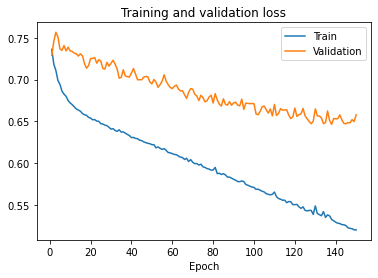

In [82]:
plot_learning_curves(history)

In [92]:
X.shape

(208, 60)

In [95]:
# Perfermance en test
score = model1.evaluate(test_x, test_y)
score

4/4 [==============================] - 0s 4ms/step - loss: 0.8005 - accuracy: 0.4600


[0.8005412220954895, 0.46000000834465027]